<span style="color:darkolivegreen;font-weight:800;font-size:32px">
    ArangoGraph Notebook: Cyber Threat Detection
</span>

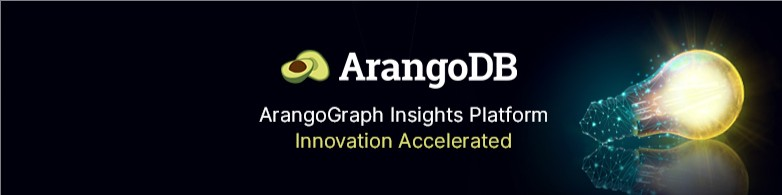

## ArangoGraph Insights Platform and ArangoGraph Notebook server
The Cyber Threat Detection demo is an ArangoGraph Notebook designed to execute on the JupyterLab notebook server embedded in the ArangoGraph Insights Platform. To run this notebook, you need to have an account on ArangoGraph.  If you do not have an account, you can sign up for a free account at https://cloud.arangodb.com 

### ArangoGraph Deployment
Use an existing deployment or create a new one to use. Once you have a database deployment on ArangoGraph, navigate to the "Data Science" tab and then deploy a notebook server. Upload this notebook into the notebook server and start testing the notebook.

### The Cyber Threat Detection Notebook
The notebook integrates seamlessly with the ArangoGraph ecosystem, automatically connecting to ArangoGraph services, including ArangoDB and the ArangoML platform services. This integration makes it much easier to leverage these resources without having to remember usernames, passwords, and endpoint URLs. The ArangoDB Notebook also implements "Magic" commands that make it very easy to leverage ArangoGraph Services. The ArangoGraph Notebook also pre-installs python-arango and ArangoML connectors to PyG, DGL, CuGraph, as well as the FastGraphML library, so you can get started right away accessing data in ArangoDB to develop GraphML models using your favorite GraphML libraries with GPU's.

# Cyber Threat Detection Overview
ArangoDB's graph database architecture is a powerful tool for analyzing and visualizing complex data related to cyber threats. This tutorial showcases ArangoGraph Insights Platform's capabilities in action to detect and understand these threats.

### Cyber Knowledge Graph 
The Cyber Knowledge Graph is the result of fusing together disparate data from network packet capture, email, and domain name registration information, to detect threats. The demonstration shows how to detect known threats and unknown threats

### Known Threat Detection
For known threat detection, we demonstrate how to use a simple graph query to detect Trickbot Intrusions. The resulting graph of the Trickbot intrusion will show you what happened and expand the detection to the emails that caused the infection.

### Unknown Threat Detection
We use Graph Neural Networks (GNNs) to do anomaly detection on the network traffic. GNNs learn the network behavior around hosts and allow you to identify uncommon behavior.

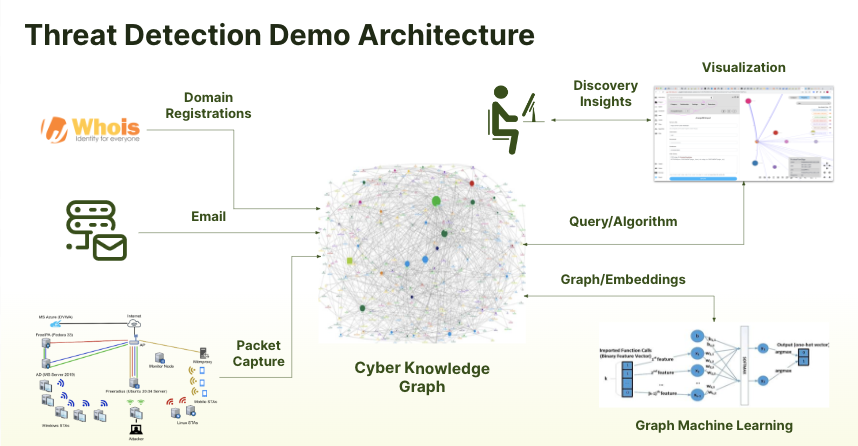


### Cyber Knowledge Graph
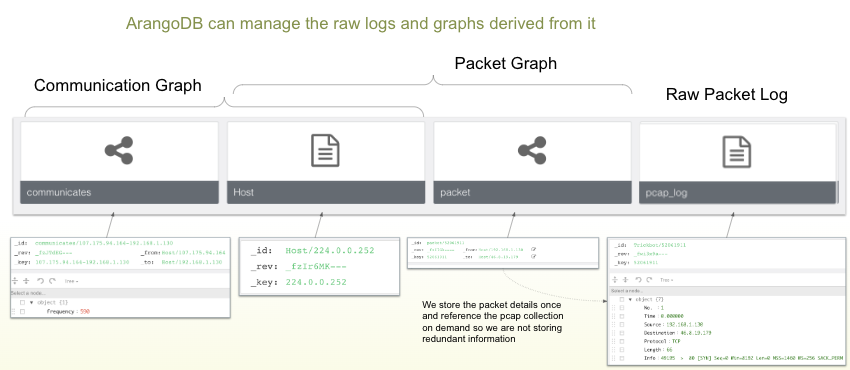

#### For house-keeping purposes, lets make sure the tutorial database does not exist

In [ ]:
%deleteDatabase ArangoCyber

#### and then create the database 'arangocyber'

In [ ]:
%createDatabase ArangoCyber

#### Select myArangoDB to use
Selecting the database makes it the current database as a convenience. The magic command binds it to '_db' if you would like to access the api directly.

In [ ]:
%useDatabase ArangoCyber

In [ ]:
from arango_datasets.datasets import Datasets
from arango import ArangoClient

# _db refers the active database, this is set when calling `useDatabase`
datasets = Datasets(_db)

# list available datasets
datasets.list_datasets()

In [ ]:
# Import the dataset
datasets.load("CYBER")

### View the Packet Graph
Run this in the ArangoDB editor to see a graph visualization of the graph.

In [ ]:
%%aql
FOR edge IN packet
RETURN edge

#### You can visualize the Cyber Knowledge Graph in ArangoDB by creating a named graph 'Cyber_Knowledge_Graph' and then clicking on the graph in the ArangoDB Dashboard to view it in the graph visualizer.

In [ ]:
%deleteGraph Cyber_Knowledge_Graph
%createGraph Cyber_Knowledge_Graph
%useGraph Cyber_Knowledge_Graph
%createEdgeDefinition {"edge_collection" : "packet", "from_vertex_collections": ["Host"], "to_vertex_collections" : ["Host"]}

## Trickbot Malware Synopsis
TrickBot—first identified in 2016—is a Trojan developed and operated by a sophisticated group of cybercrime actors. Originally designed as a banking Trojan to steal financial data, TrickBot has evolved into highly modular, multi-stage malware that provides its operators a full suite of tools to conduct a myriad of illegal cyber activities.

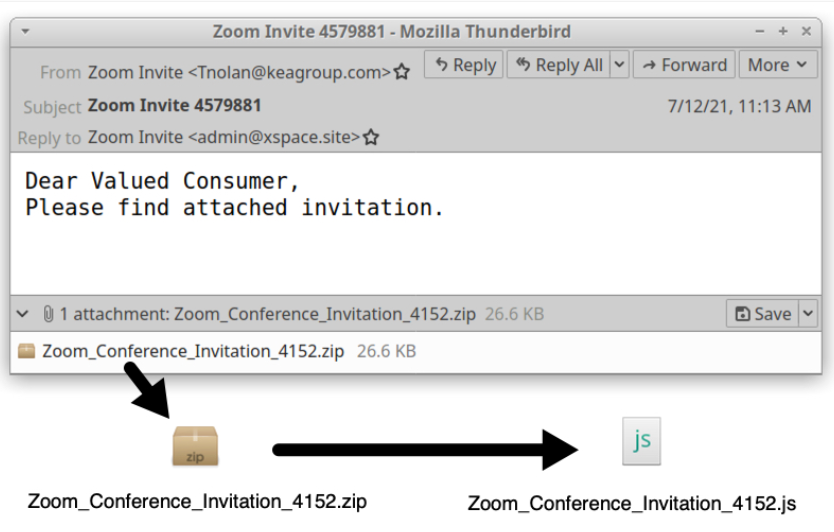

#### Changes to the infected host file system

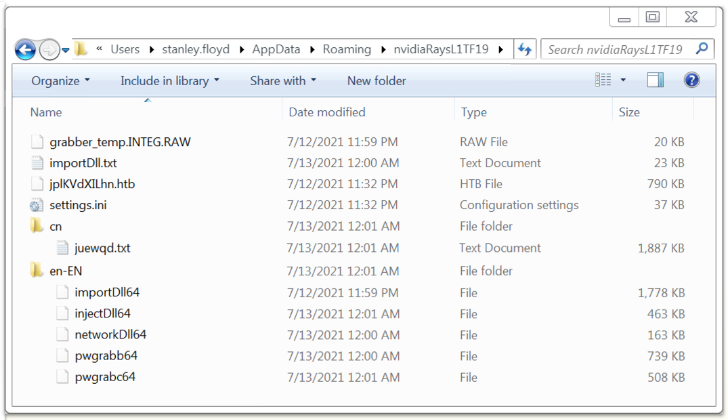

### The following query searches the communication graph for the graph patterns characteristic of TrickBot intrusions
Run this query to see a graph visualization of TrickBot intrusion.

In [ ]:
%%aql
FOR packet IN packet
FILTER packet.Protocol == "HTTP" AND (CONTAINS(packet.Info,"GET") OR CONTAINS(packet.Info,"POST")) OR (packet.Protocol=="TLSv1")
FILTER packet.Protocol != "SSDP"
RETURN packet

### Cleanup Database

In [ ]:
# Uncomment and run the following line to cleanup the database
# %deleteDatabase ArangoCyber